<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Applied-Data-Analysis-Homework-2---Data-from-the-Web" data-toc-modified-id="Applied-Data-Analysis-Homework-2---Data-from-the-Web-1">Applied Data Analysis Homework 2 - Data from the Web</a></span><ul class="toc-item"><li><span><a href="#Deadline" data-toc-modified-id="Deadline-1.1">Deadline</a></span></li><li><span><a href="#Important-Notes" data-toc-modified-id="Important-Notes-1.2">Important Notes</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-1.3">Background</a></span></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-1.4">Assignment</a></span></li></ul></li><li><span><a href="#Question-1:-QS-Top-Universities" data-toc-modified-id="Question-1:-QS-Top-Universities-2">Question 1: QS Top Universities</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Approach" data-toc-modified-id="Approach-2.0.1">Approach</a></span></li></ul></li><li><span><a href="#Extract-Student/Faculty-Numbers" data-toc-modified-id="Extract-Student/Faculty-Numbers-2.1">Extract Student/Faculty Numbers</a></span></li><li><span><a href="#Top-Universities-Final-File" data-toc-modified-id="Top-Universities-Final-File-2.2">Top Universities Final File</a></span></li><li><span><a href="#Response-to-Questions" data-toc-modified-id="Response-to-Questions-2.3">Response to Questions</a></span></li><li><span><a href="#Aggregated-by-Country" data-toc-modified-id="Aggregated-by-Country-2.4">Aggregated by Country</a></span></li><li><span><a href="#Aggregated-by-Region" data-toc-modified-id="Aggregated-by-Region-2.5">Aggregated by Region</a></span></li></ul></li><li><span><a href="#QS-Plots" data-toc-modified-id="QS-Plots-3">QS Plots</a></span><ul class="toc-item"><li><span><a href="#QS-Faculty-to-Student-Ratio" data-toc-modified-id="QS-Faculty-to-Student-Ratio-3.1">QS Faculty to Student Ratio</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3.1.1">Analysis</a></span></li></ul></li><li><span><a href="#QS-International-Students-to-Total-Students-Ratio" data-toc-modified-id="QS-International-Students-to-Total-Students-Ratio-3.2">QS International Students to Total Students Ratio</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3.2.1">Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Times-Higher-Education-(THE)" data-toc-modified-id="Times-Higher-Education-(THE)-4">Times Higher Education (THE)</a></span><ul class="toc-item"><li><span><a href="#THE-Final-File" data-toc-modified-id="THE-Final-File-4.1">THE Final File</a></span></li><li><span><a href="#THE-Aggregated-by-Country" data-toc-modified-id="THE-Aggregated-by-Country-4.2">THE Aggregated by Country</a></span></li><li><span><a href="#THE-Aggregated-by-Region" data-toc-modified-id="THE-Aggregated-by-Region-4.3">THE Aggregated by Region</a></span></li></ul></li><li><span><a href="#THE-Plots" data-toc-modified-id="THE-Plots-5">THE Plots</a></span><ul class="toc-item"><li><span><a href="#THE-Student-to-Faculty-Ratio" data-toc-modified-id="THE-Student-to-Faculty-Ratio-5.1">THE Student to Faculty Ratio</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5.1.1">Analysis</a></span></li></ul></li><li><span><a href="#THE-International-Students-to-Total-Students-Ratio" data-toc-modified-id="THE-International-Students-to-Total-Students-Ratio-5.2">THE International Students to Total Students Ratio</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5.2.1">Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Merging-two-Data-Sets" data-toc-modified-id="Merging-two-Data-Sets-6">Merging two Data Sets</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-7">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-7.1">Correlation Matrix</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-7.1.1">Analysis</a></span></li></ul></li><li><span><a href="#Feature-Histograms" data-toc-modified-id="Feature-Histograms-7.2">Feature Histograms</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-7.2.1">Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Exercice-5" data-toc-modified-id="Exercice-5-8">Exercice 5</a></span></li></ul></div>

# Applied Data Analysis Homework 2 - Data from the Web

## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-fÃ©dÃ©rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
 - Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
 - Answer the previous question aggregating the data by (c) country and (d) region.

 Plot your data using bar charts and describe briefly what you observed.

2. Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4. Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5. Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

In [12]:
# Import libraries
import requests
import pandas as pd
import numpy as np
import seaborn
%matplotlib inline
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

# Question 1: QS Top Universities

### Approach

For this question, we follow theses steps:
1. Using the Postman and its interceptor, we collect the json file that the browser recieves. 
2. After converting the row data to a DataFrame, we extract a country to region dictionary which will come useful when we treat Times Higher Education (THE) data for the next question.
3. At the very start we drop some unncessary features like 'nid',... .


In [13]:
NUMOF_UNIVERSITIES = 200

In [14]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508525234343')

In [15]:
raw_data = r.json()['data']
DF = pd.DataFrame.from_dict(raw_data)

# Extracting the country->region dictionary mapping for THE
country2region = dict(DF[['country', 'region']].values.tolist())

DF = DF[:NUMOF_UNIVERSITIES]
DF = DF.drop(['core_id', 'guide', 'nid', 'stars', 'logo', 'cc', 'score'], axis=1)
DF.head()

,country,rank_display,region,title,url
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,United States,2,North America,Stanford University,/universities/stanford-university
2,United States,3,North America,Harvard University,/universities/harvard-university
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge


## Extract Student/Faculty Numbers

For information like the number of faculty or students, we need to follow the URL given with each record. For this purpose, we parse the corresponding pages for each university using beautiful soup. This is done using a **split-apply-combine** (functional) style.

We also handle cases where the website data might be lacking by placing NaNs. We will later on check how many such occurancies exists.

In [16]:
def extract_numbers(address_complement): # Extracts the number of total/international faculties/students in a tuple
    # Make the request
    r = requests.get('https://www.topuniversities.com' + address_complement)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    
    # Extracting number of  total faculty memebrs
    total_fac_set = soup.find_all('div', 'total faculty')
    try:
        total_fac = int(total_fac_set[0].div.find_all('div', 'number')[0].get_text()
                        .strip().replace(',', '')) # the numbers are given as strings, some cleaning up is necessary.
    except IndexError:
        total_fac = np.nan

    # Extracting number of  international faculty memebrs
    inter_fac_set = soup.find_all('div', 'inter faculty')
    try:
        inter_fac = int(inter_fac_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))
    except IndexError:
        inter_fac = np.nan

    # Extracting number of  total students
    total_std_set = soup.find_all('div', 'total student')
    try:
        total_std = int(total_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))        
    except IndexError:
        total_std = np.nan
        
    # Extracting number of international students
    inter_std_set = soup.find_all('div', 'total inter')
    try:
        inter_std = int(inter_std_set[0].div.find_all('div', 'number')[0].get_text().strip().replace(',', ''))
    except IndexError:
        return np.nan, np.nan, np.nan, np.nan

    return inter_std, total_std, inter_fac, total_fac


In [17]:
numbers_DF = (DF['url'].apply(lambda x:extract_numbers(x)) # Applying the function to each URL.
                       .apply(pd.Series)) # This seperates the 4-tuple into seperate data frame columns.

# The columns are named [0, 1, 2, 3], we renamed them appropriately. 
numbers_DF.rename(columns=dict(zip(range(4),['inter_std', 'total_std', 'inter_fac', 'total_fac'])), inplace=True)
numbers_DF.head()

,inter_std,total_std,inter_fac,total_fac
0,3717.0,11067.0,1679.0,2982.0
1,3611.0,15878.0,2042.0,4285.0
2,5266.0,22429.0,1311.0,4350.0
3,647.0,2255.0,350.0,953.0
4,6699.0,18770.0,2278.0,5490.0


## Top Universities Final File

Finally we remove the 'url' column since we have extracte all the data that we need. We also add the new features we scrapped from the details page of universities to our final dataframe **DF_topuni**. All fields are in correct formating, except the rank_display, which contains strings. We keep this as is for the moment, because it allows for showing the '=' sign (which signifies equal ranking) as well as the given rank number (hence the name rank__*display*). 

In [18]:
DF_ = DF.drop('url', axis=1)
DF_topuni = pd.concat((DF_, numbers_DF), axis=1)
DF_topuni.head()

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac
0,United States,1,North America,Massachusetts Institute of Technology (MIT),3717.0,11067.0,1679.0,2982.0
1,United States,2,North America,Stanford University,3611.0,15878.0,2042.0,4285.0
2,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0
3,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0
4,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0


We check for any missing values:

In [20]:
DF_topuni[DF_topuni.isnull().any(1)]

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac
51,United States,52,North America,New York University (NYU),NaN,NaN,NaN,NaN
189,India,190,Asia,Indian Institute of Science (IISc) Bangalore,47.0,4071.0,NaN,423.0


We manually check QS rankings webpage for these universities and verify that their respective pages don't have the corresponding values.

## Response to Questions

- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?

To answer these questions we need to calculate these ratios with proper implict funtions and .apply() method:

In [21]:
DF_topuni['Fac_Std_ratio'] = DF_topuni.apply(lambda x: x['total_fac']/float(x['total_std']), axis=1)
DF_topuni['interStd_totalStd_ratio'] = DF_topuni.apply(lambda x: x['inter_std']/float(x['total_std']), axis=1)

a) The best 5 universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [22]:
# Sroting the table by the ranking values and presenting the top 5:
DF_topuni.sort_values(by='Fac_Std_ratio', ascending=False).reset_index(drop=True).head(5)

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
0,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0,0.422616,0.286918
1,United States,16,North America,Yale University,2469.0,12402.0,1708.0,4940.0,0.398323,0.199081
2,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,0.342292,0.372870
3,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,0.292488,0.356899
4,United States,17,North America,Johns Hopkins University,4105.0,16146.0,1061.0,4462.0,0.276353,0.254243


b) The best 5 universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [23]:
DF_topuni.sort_values(by='interStd_totalStd_ratio', ascending=False).reset_index(drop=True).head(5)

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
0,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748.0,9760.0,687.0,1088.0,0.111475,0.691393
1,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),5896.0,10343.0,1300.0,1695.0,0.163879,0.570047
2,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,0.244251,0.543567
3,Netherlands,200,Europe,Maastricht University,8234.0,16385.0,502.0,1277.0,0.077937,0.502533
4,United States,=47,North America,Carnegie Mellon University,6385.0,13356.0,425.0,1342.0,0.100479,0.478062


## Aggregated by Country

To answer these aggregation questions, we make use of .groupby() method to parition the dataframe into said groups, and then find the maximizer of the desired variable, e.g. Faculty/Student Ratio. Next, we give the corresponding record (the record with maxiumum Fac./Stud. in each region) in the dataframe using .iloc().

c-1) [Aggregated by 'country'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [26]:
DF_topuni_country_Fac_Std_ratio = DF_topuni.iloc[DF_topuni.groupby('country')['Fac_Std_ratio'].idxmax()]
DF_topuni_country_Fac_Std_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
19,Australia,20,Oceania,The Australian National University,5551.0,14442.0,927.0,1600.0,0.110788,0.384365
153,Austria,154,Europe,University of Vienna,14468.0,45967.0,1400.0,3411.0,0.074205,0.314748
181,Belgium,=182,Europe,Vrije Universiteit Brussel (VUB),1853.0,9284.0,515.0,1792.0,0.193020,0.199591
120,Brazil,121,Latin America,Universidade de São Paulo,2086.0,65711.0,279.0,5582.0,0.084948,0.031745
139,Canada,140,North America,McMaster University,3548.0,23702.0,1170.0,3231.0,0.136318,0.149692
137,Chile,=137,Latin America,Pontificia Universidad Católica de Chile (UC),991.0,27003.0,198.0,2260.0,0.083694,0.036700
24,China,25,Asia,Tsinghua University,4072.0,36300.0,932.0,5506.0,0.151680,0.112176
116,Denmark,=116,Europe,Technical University of Denmark,2098.0,8878.0,966.0,2117.0,0.238455,0.236314
102,Finland,=102,Europe,University of Helsinki,1234.0,22419.0,535.0,2645.0,0.117980,0.055043


c-1) [Aggregated by 'country'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [27]:
DF_topuni_country_interStd_totalStd_ratio = DF_topuni.iloc[DF_topuni.groupby('country')['interStd_totalStd_ratio'].idxmax()]
DF_topuni_country_interStd_totalStd_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
41,Australia,=41,Oceania,The University of Melbourne,18030.0,42182.0,1477.0,3311.0,0.078493,0.427434
153,Austria,154,Europe,University of Vienna,14468.0,45967.0,1400.0,3411.0,0.074205,0.314748
181,Belgium,=182,Europe,Vrije Universiteit Brussel (VUB),1853.0,9284.0,515.0,1792.0,0.193020,0.199591
182,Brazil,=182,Latin America,Universidade Estadual de Campinas (Unicamp),966.0,26572.0,109.0,1968.0,0.074063,0.036354
31,Canada,32,North America,McGill University,9540.0,28837.0,1220.0,3646.0,0.126435,0.330825
199,Chile,201,Latin America,Universidad de Chile,2134.0,38848.0,127.0,2256.0,0.058072,0.054932
37,China,=38,Asia,Peking University,7090.0,42136.0,1038.0,5185.0,0.123054,0.168265
116,Denmark,=116,Europe,Technical University of Denmark,2098.0,8878.0,966.0,2117.0,0.238455,0.236314
138,Finland,=137,Europe,Aalto University,1831.0,12147.0,370.0,1257.0,0.103482,0.150737


## Aggregated by Region

c-1) [Aggregated by 'region'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [28]:
DF_topuni_region_Fac_Std_ratio = DF_topuni.iloc[DF_topuni.groupby('region')['Fac_Std_ratio'].idxmax()]
DF_topuni_region_Fac_Std_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
190,South Africa,191,Africa,University of Cape Town,3325.0,19593.0,379.0,1733.0,0.088450,0.169703
70,South Korea,=71,Asia,Pohang University of Science And Technology (P...,126.0,3117.0,113.0,664.0,0.213025,0.040423
5,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,0.342292,0.372870
197,Mexico,199,Latin America,Instituto Tecnológico y de Estudios Superiores...,1412.0,13376.0,821.0,1822.0,0.136214,0.105562
3,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0,0.422616,0.286918
19,Australia,20,Oceania,The Australian National University,5551.0,14442.0,927.0,1600.0,0.110788,0.384365


c-1) [Aggregated by 'region'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [29]:
DF_topuni_region_interStd_totalStd_ratio = DF_topuni.iloc[DF_topuni.groupby('region')['interStd_totalStd_ratio'].idxmax()]
DF_topuni_region_interStd_totalStd_ratio

,country,rank_display,region,title,inter_std,total_std,inter_fac,total_fac,Fac_Std_ratio,interStd_totalStd_ratio
190,South Africa,191,Africa,University of Cape Town,3325.0,19593.0,379.0,1733.0,0.088450,0.169703
25,Hong Kong,26,Asia,The University of Hong Kong,8230.0,20214.0,2085.0,3012.0,0.149006,0.407144
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748.0,9760.0,687.0,1088.0,0.111475,0.691393
74,Argentina,75,Latin America,Universidad de Buenos Aires (UBA),27109.0,122301.0,3165.0,16421.0,0.134267,0.221658
47,United States,=47,North America,Carnegie Mellon University,6385.0,13356.0,425.0,1342.0,0.100479,0.478062
41,Australia,=41,Oceania,The University of Melbourne,18030.0,42182.0,1477.0,3311.0,0.078493,0.427434


# QS Plots

Plot your data using bar charts and describe briefly what you observed.

## QS Faculty to Student Ratio

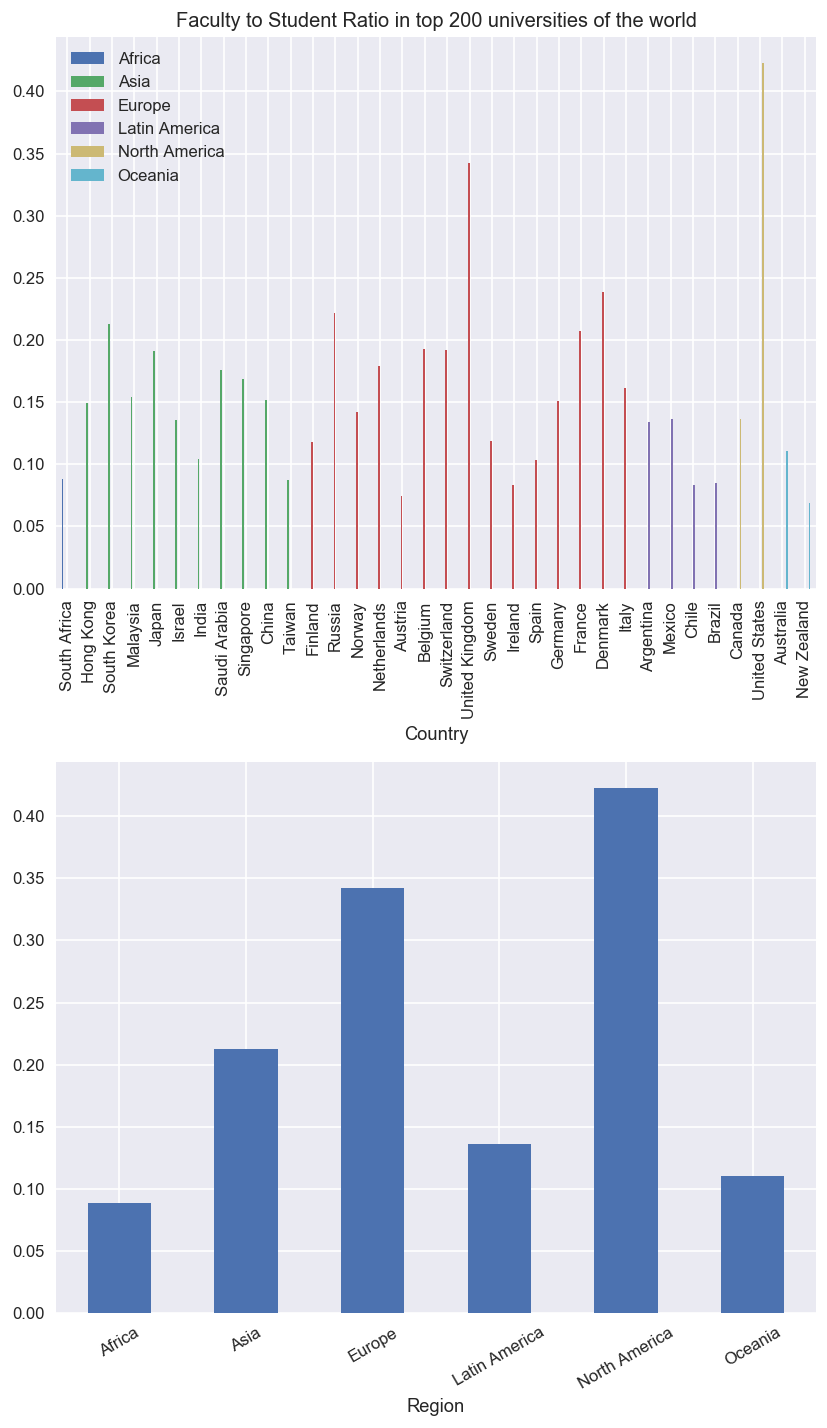

In [51]:
# Note: extra paranthesis () are necessary to allow inline comments 
# with functional-style calls in each line,i.e., .foo()

country_names = (DF_topuni_country_Fac_Std_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting)
        
A = (DF_topuni_country_Fac_Std_ratio[['country', 'region', 'Fac_Std_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='Fac_Std_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
fig = plt.figure(figsize=(7, 12), dpi= 120)
ax1 = plt.subplot(2,1,1)
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='Faculty to Student Ratio in top 200 universities of the world',
                  ax=ax1))

# Comparing only different regions
ax2 = plt.subplot(2,1,2)
(DF_topuni_region_Fac_Std_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='Fac_Std_ratio', legend=None, rot=30, ax=ax2))
plt.tight_layout()

### Analysis

The bar charts show that North America (and especially US) have a very high (up to 40%) ratio of faculty-student.  Next comes UK and Denmark. Russia is at the 4th place followed by France. 

## QS International Students to Total Students Ratio

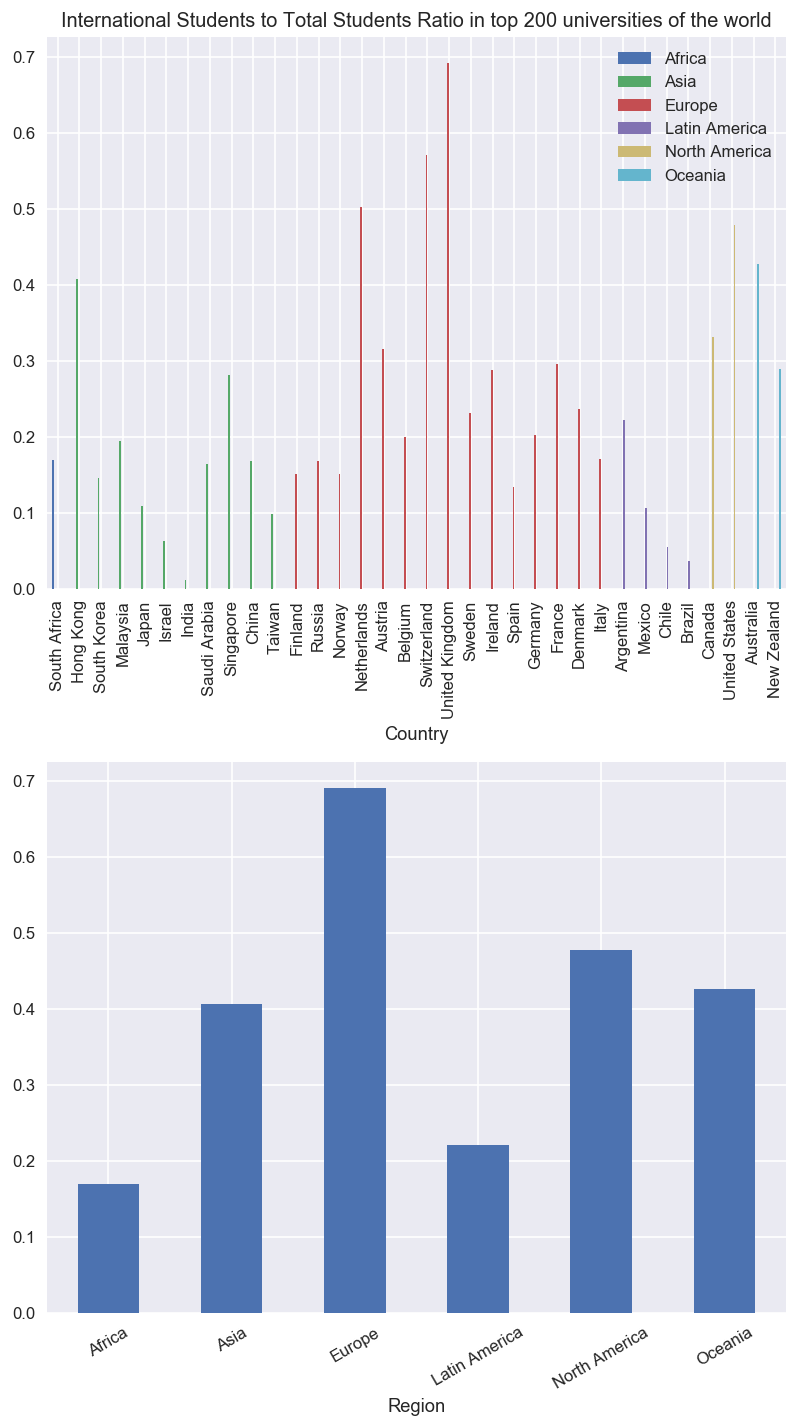

In [49]:
country_names = (DF_topuni_country_interStd_totalStd_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting
        
A = (DF_topuni_country_interStd_totalStd_ratio[['country', 'region', 'interStd_totalStd_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='interStd_totalStd_ratio')) # pivot so regions be plotted as seperate groups

# Plotting
fig = plt.figure(figsize=(7, 12), dpi= 120)
ax1 = plt.subplot(2,1,1)
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='International Students to Total Students Ratio in top 200 universities of the world',
                  ax=ax1))

# Comparing only different regions
ax2 = plt.subplot(2,1,2)
(DF_topuni_region_interStd_totalStd_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='interStd_totalStd_ratio', legend=None, rot=30, ax=ax2))
plt.tight_layout()

### Analysis

From the regional plot we observe, that Europe has the highest ratio of international students to total student (70%) in the world. However, one needs to note that the ranking conisders european but not locals as international students. Knowing this, and given the prevelance of study programs for Eurpoean students to study in another Eurpoean country other than their own, this is somehow expected.

This is why the country bar charts are more revealing. It's United Kindom, followed by Switzerland and Netherland who have the highest portion of intenrational students. United States comes 4th, followed by Australia. Among the Asian countries, Hong Kong and Singapore have the highest international to total student ratios. 

# Times Higher Education (THE)

In [29]:
intercepted_json ='https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(intercepted_json)

In [30]:
raw_data = r.json()['data']
DF = pd.DataFrame.from_dict(raw_data)[:NUMOF_UNIVERSITIES]
# DF = DF.drop(['core_id', 'guide', 'nid', 'stars', 'logo', 'cc', 'score'], axis=1)
DF = DF[['location', 'name', 'rank', 'rank_order', 'stats_number_students', 'stats_pc_intl_students', 'stats_student_staff_ratio']]

In [31]:
# Renaming and adjusting features to match QS
DF_ = DF.rename(columns={'location':'country', 'name': 'title', 
                   'rank': 'rank_display', 'stats_number_students': 'total_std',
                   'stats_student_staff_ratio': 'Fac_Std_ratio', 'stats_pc_intl_students':'interStd_totalStd_ratio'})
DF_['interStd_totalStd_ratio'] = DF_['interStd_totalStd_ratio'].apply(lambda x: int(x[:-1])/float(100))
DF_['Fac_Std_ratio'] = DF_['Fac_Std_ratio'].apply(lambda x: 1/float(x))
DF_['total_std'] = DF_['total_std'].apply(lambda x: int(x.replace(',', '')))

DF_

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio
0,United Kingdom,University of Oxford,1,10,20409,0.38,0.089286
1,United Kingdom,University of Cambridge,2,20,18389,0.35,0.091743
2,United States,California Institute of Technology,=3,30,2209,0.27,0.153846
3,United States,Stanford University,=3,40,15845,0.22,0.133333
4,United States,Massachusetts Institute of Technology,5,50,11177,0.34,0.114943
5,United States,Harvard University,6,60,20326,0.26,0.112360
6,United States,Princeton University,7,70,7955,0.24,0.120482
7,United Kingdom,Imperial College London,8,80,15857,0.55,0.087719
8,United States,University of Chicago,9,90,13525,0.25,0.161290
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,19233,0.38,0.068493


In [32]:
from warnings import warn

def find_location(x):
    try:
        return country2region[x] # this mapping was extracted from QS
    except KeyError:
        warn("\nThe mapping for {} does not exist!\n".format(x))
        return np.nan
    
DF_['region'] = DF_['country'].apply(lambda x: find_location(x))

C:\Users\Leonovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
The mapping for Luxembourg does not exist!

  import sys
C:\Users\Leonovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
The mapping for Russian Federation does not exist!

  import sys


We observe that the mapping for Luxembourg and Russian Federation does not exist. So we add them manually (as advised in the FAQ):

## THE Final File

In [33]:
country2region['Russian Federation'] = 'Europe'
country2region['Luxembourg'] = 'Europe'
DF_['region'] = DF_['country'].apply(lambda x: find_location(x))
DF_THE = DF_
DF_

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
0,United Kingdom,University of Oxford,1,10,20409,0.38,0.089286,Europe
1,United Kingdom,University of Cambridge,2,20,18389,0.35,0.091743,Europe
2,United States,California Institute of Technology,=3,30,2209,0.27,0.153846,North America
3,United States,Stanford University,=3,40,15845,0.22,0.133333,North America
4,United States,Massachusetts Institute of Technology,5,50,11177,0.34,0.114943,North America
5,United States,Harvard University,6,60,20326,0.26,0.112360,North America
6,United States,Princeton University,7,70,7955,0.24,0.120482,North America
7,United Kingdom,Imperial College London,8,80,15857,0.55,0.087719,Europe
8,United States,University of Chicago,9,90,13525,0.25,0.161290,North America
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,19233,0.38,0.068493,Europe


## THE Aggregated by Country

c-1) [Aggregated by 'country'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [34]:
DF_THE_country_Fac_Std_ratio = DF_THE.iloc[DF_THE.groupby('country')['Fac_Std_ratio'].idxmax()]
DF_THE_country_Fac_Std_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
47,Australia,Australian National University,48,480,15986,0.35,0.051813,Oceania
164,Austria,University of Vienna,=165,1650,35375,0.26,0.048077,Europe
106,Belgium,Ghent University,107,1070,35909,0.10,0.027855,Europe
41,Canada,McGill University,42,420,30940,0.26,0.075188,North America
131,China,University of Science and Technology of China,132,1320,16032,0.03,0.121951,Asia
109,Denmark,University of Copenhagen,=109,1100,30395,0.14,0.243902,Europe
89,Finland,University of Helsinki,90,900,22532,0.06,0.061728,Europe
114,France,École Polytechnique,115,1150,2799,0.36,0.196078,Europe
34,Germany,LMU Munich,=34,350,36091,0.15,0.064103,Europe
119,Hong Kong,City University of Hong Kong,=119,1200,9240,0.35,0.089286,Asia


c-1) [Aggregated by 'country'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [35]:
DF_THE_country_interStd_totalStd_ratio = DF_THE.iloc[DF_THE.groupby('country')['interStd_totalStd_ratio'].idxmax()]
DF_THE_country_interStd_totalStd_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
31,Australia,University of Melbourne,32,320,42116,0.40,0.037594,Oceania
164,Austria,University of Vienna,=165,1650,35375,0.26,0.048077,Europe
174,Belgium,Université Libre de Bruxelles,=175,1750,25343,0.35,0.023041,Europe
33,Canada,University of British Columbia,=34,340,51889,0.29,0.055249,North America
28,China,Peking University,=27,290,42136,0.16,0.112360,Asia
152,Denmark,Technical University of Denmark,=153,1530,8548,0.24,0.166667,Europe
189,Finland,Aalto University,190,1900,12744,0.20,0.049505,Europe
114,France,École Polytechnique,115,1150,2799,0.36,0.196078,Europe
40,Germany,Technical University of Munich,41,410,38689,0.23,0.018382,Europe
39,Hong Kong,University of Hong Kong,40,400,18364,0.42,0.055556,Asia


## THE Aggregated by Region

c-1) [Aggregated by 'region'] the best universities in terms of $\frac{|\text{faculty}|}{|\text{students}|}$ :

In [36]:
DF_THE_region_Fac_Std_ratio = DF_THE.iloc[DF_THE.groupby('region')['Fac_Std_ratio'].idxmax()]
DF_THE_region_Fac_Std_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
170,South Africa,University of Cape Town,171,1710,20775,0.18,0.085470,Africa
45,Japan,University of Tokyo,46,460,26000,0.10,0.149254,Asia
109,Denmark,University of Copenhagen,=109,1100,30395,0.14,0.243902,Europe
105,United States,Vanderbilt University,=105,1060,12011,0.13,0.303030,North America
191,New Zealand,University of Auckland,192,1920,30348,0.29,0.053191,Oceania


c-1) [Aggregated by 'region'] The best universities in terms of $\frac{|\;\text{international students}\;|}{|\;\text{students}\;|}$ :

In [37]:
DF_THE_region_interStd_totalStd_ratio = DF_THE.iloc[DF_THE.groupby('region')['interStd_totalStd_ratio'].idxmax()]
DF_THE_region_interStd_totalStd_ratio

,country,title,rank_display,rank_order,total_std,interStd_totalStd_ratio,Fac_Std_ratio,region
170,South Africa,University of Cape Town,171,1710,20775,0.18,0.085470,Africa
39,Hong Kong,University of Hong Kong,40,400,18364,0.42,0.055556,Asia
24,United Kingdom,London School of Economics and Political Science,=25,250,10065,0.71,0.081967,Europe
23,United States,Carnegie Mellon University,24,240,12676,0.45,0.074074,North America
31,Australia,University of Melbourne,32,320,42116,0.40,0.037594,Oceania


# THE Plots

Plot your data using bar charts and describe briefly what you observed.

## THE Student to Faculty Ratio

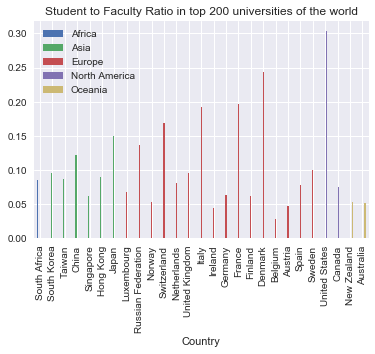

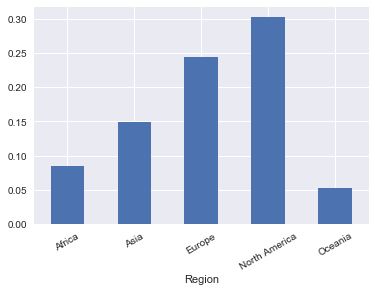

In [38]:
# Note: extra paranthesis () are necessary to allow inline comments 
# with functional-style calls in each line,i.e., .foo()

country_names = (DF_THE_country_Fac_Std_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting)
        
A = (DF_THE_country_Fac_Std_ratio[['country', 'region', 'Fac_Std_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='Fac_Std_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='Student to Faculty Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_THE_region_Fac_Std_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='Fac_Std_ratio', legend=None, rot=30))

### Analysis
- 

## THE International Students to Total Students Ratio

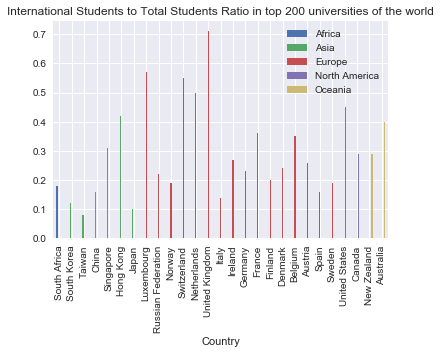

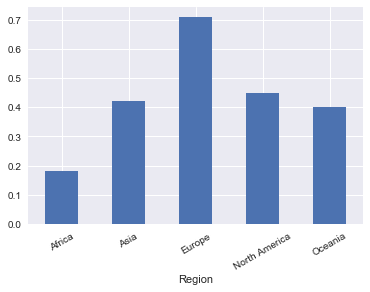

In [39]:
country_names = (DF_THE_country_interStd_totalStd_ratio
                    .sort_values('region')
                    .country.tolist()) # Extract country names needed after pivoting
        
A = (DF_THE_country_interStd_totalStd_ratio[['country', 'region', 'interStd_totalStd_ratio']]
        .sort_values('region').reset_index(drop=True) # reset indices to maintain regional order
        .rename(columns={'region':'Region'})
        .pivot(columns='Region', values='interStd_totalStd_ratio')) # pivot so regions be plotted as seperate groups

# Plotting 
(pd.concat((A, pd.DataFrame({'Country':country_names})), axis=1) # adding country names to the pivoted DF
        .set_index('Country') # changing the numerical index to string name of countries
        .plot.bar(width=0.5, 
                  title='International Students to Total Students Ratio in top 200 universities of the world'))

# Comparing only different regions
(DF_THE_region_interStd_totalStd_ratio
     .rename(columns={'region':'Region'})
     .plot.bar(x='Region', y='interStd_totalStd_ratio', legend=None, rot=30))

### Analysis
- 

# 

# Merging two Data Sets

 "3". Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

In [40]:

def get_closest_match(left_df, right_df, right_df_matching_column_name):
    # gets the closest matching between the left_df and right_df on the column name specified. 
    import difflib
    result = difflib.get_close_matches(left_df, 
                                       right_df[right_df_matching_column_name], 
                                       n=1, 
                                       cutoff=0.6) # the default threshold is 60% similarity.
    try:
        return result[0]
    except IndexError:
        return np.nan

DF_topuni_ = DF_topuni.copy(deep=True).reset_index() # by reseting the index, we add another column (to keep track 
                                                     #  of  things after merging.)
DF_THE_ = DF_THE.copy(deep=True).reset_index()

# Do some filtering on titles to reduce common words' effect on resembelence scores
DF_THE_['filtered_title'] = DF_THE_['title'].apply(lambda x: x.replace('University', '').replace('of', ''))
DF_topuni_['filtered_title'] = DF_topuni_['title'].apply(lambda x: x.replace('University', '').replace('of', ''))

# Match the filtered university titles and create a common column between the two tables
DF_topuni_['filtered_title'] = (DF_topuni_['filtered_title']
                               .apply(lambda x: get_closest_match(x, DF_THE_, 'filtered_title')))

# Drop records that aren't in both datasets (done according to the FAQ session's directions)
DF_topuni_.dropna(inplace=True)
                              
# Setup a MultiIndex to allow for a more accurate merge
DF_topuni_.set_index(['country', 'filtered_title'], inplace=True)
DF_THE_.set_index(['country', 'filtered_title'], inplace=True)

# Merge on the newluy created index
DF_merged = DF_THE_.merge(DF_topuni_, left_index=True, right_index=True, suffixes=['_THE', '_QS'] )

# Reorder columns for better comparison purposes. Columns with no _QS/_THE suffix belong to only one data set.
DF_merged = DF_merged.reindex_axis(['index_THE', 'index_QS', 'title_THE', 'title_QS', 'rank_display_THE', 'rank_display_QS',
                     'total_std_THE', 'total_std_QS', 'interStd_totalStd_ratio_THE', 'interStd_totalStd_ratio_QS', 
                    'Fac_Std_ratio_THE', 'Fac_Std_ratio_QS', 'region_THE', 'region_QS', 'inter_std', 'inter_fac', 
                     'total_fac', 'rank_order'], axis=1)

from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(len(DF_merged))
    display(DF_merged)

154

index_THE  \
country        filtered_title                                                  
Australia        Adelaide                                                133   
                 Melbourne                                                31   
                 New South Wales                                          84   
                 Queensland                                               64   
                 Sydney                                                   60   
                 Western Australia                                       111   
               Australian National                                        47   
               Monash                                                     80   
Austria          Vienna                                                  164   
Belgium        Ghent                                                     106   
               KU Leuven                                                  46   
               Université Catholique de Louvain                          128   
Canada           Alberta                                                 118   
                 British Columbia                                         33   
                 Toronto                                                  22   
               McGill                                                     41   
               McMaster                                                   77   
China            Science and Technology  China                           131   
               Fudan                                                     115   
               Nanjing                                                   168   
               Peking                                                     28   
               Shanghai Jiao Tong                                        188   
               Tsinghua                                                   29   
               Zhejiang                                                  177   
Denmark          Copenhagen                                              109   
               Aarhus                                                    108   
               Technical   Denmark                                       152   
Finland          Helsinki                                                 89   
               Aalto                                                     189   
France         Pierre and Marie Curie                                    123   
               École Normale Supérieure de Lyon                          181   
               École Normale Supérieure de Lyon                          181   
               École Polytechnique                                       114   
Germany          Göttingen                                               112   
               Humboldt   Berlin                                          61   
               Karlsruhe Institute  Technology                           132   
               RWTH Aachen                                                78   
               Technical   Munich                                         40   
Hong Kong        Hong Kong                                                39   
               Chinese   Hong Kong                                        57   
               City   Hong Kong                                          119   
               Hong Kong   Science and Technology                         43   
               Hong Kong Polytechnic                                     182   
Ireland        Trinity College Dublin                                    117   
               Trinity College Dublin                                    117   
Italy          Scuola Normale Superiore di Pisa                          183   
Japan            Tokyo                                                    45   
               Kyoto                                                      73   
Netherlands      Amsterdam                                         

# Exploratory Data Analysis

##  Correlation Matrix

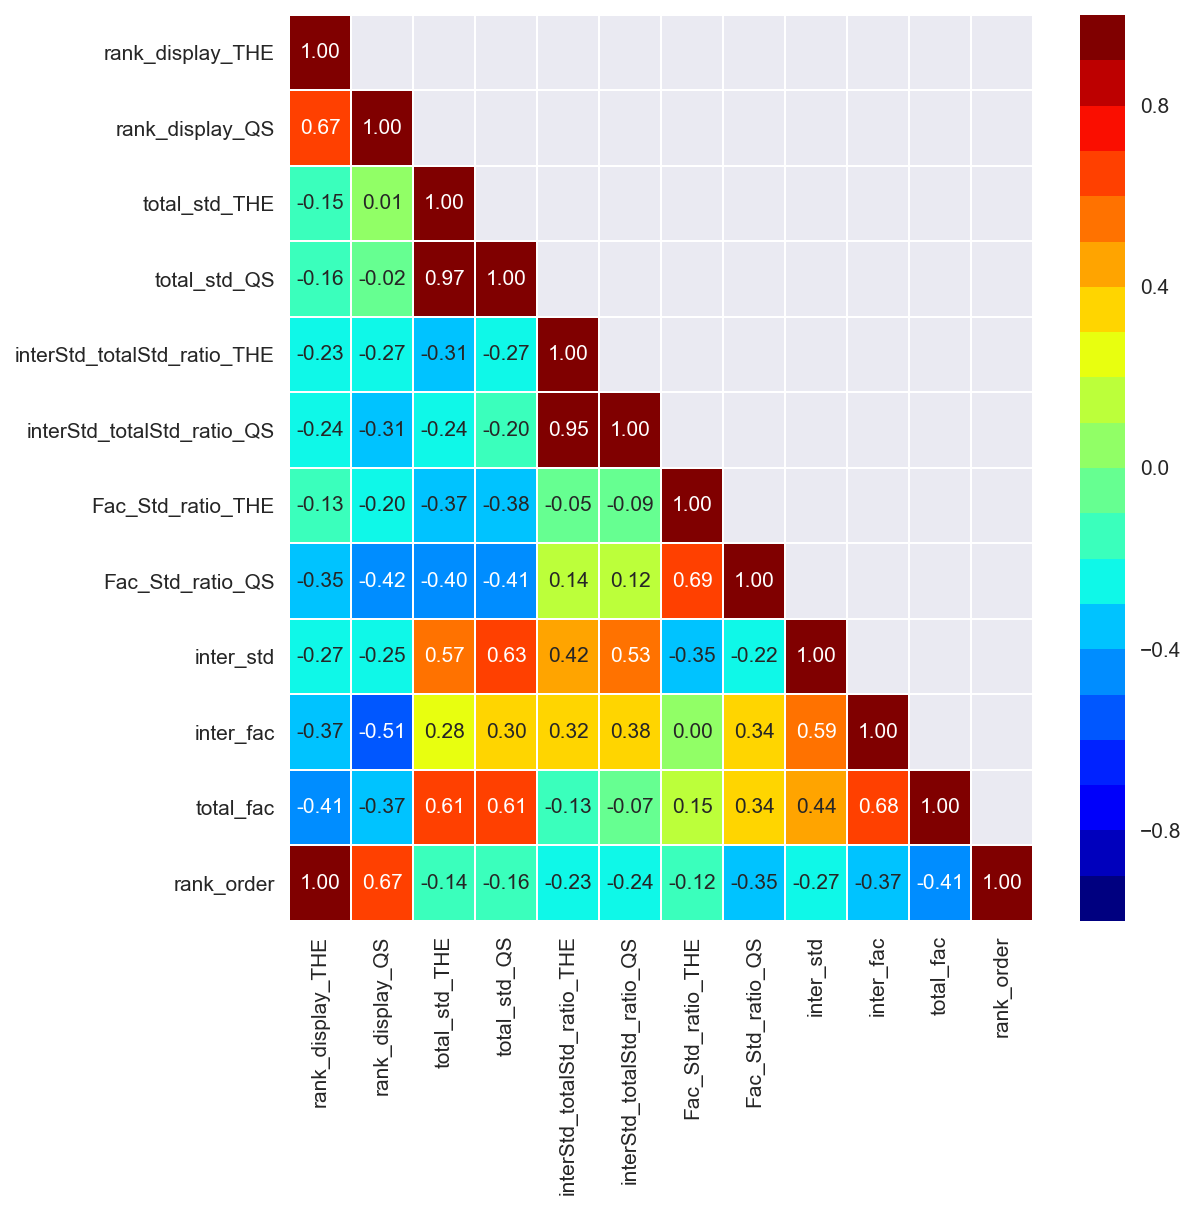

In [41]:
import seaborn as sns
from matplotlib import cm as cm


# Clean-up for dataframe before calculating the correlation matrix
DF_merged_ = DF_merged.reset_index(drop=True).drop(['index_THE', 'index_QS'], axis=1) # drop indices 
DF_merged_['rank_display_THE'] = DF_merged_['rank_display_THE']\
                                    .apply(lambda x: int(x.replace('=', ''))) # replace '=' signs, and convert to int
DF_merged_['rank_display_QS'] = DF_merged_['rank_display_QS']\
                                    .apply(lambda x: int(x.replace('=', '')))
DF_merged_['rank_order'] = DF_merged_['rank_order']\
                                    .apply(lambda x: int(x))
    
# Calculate the correlation matrix
corr = DF_merged_.corr()
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
# corr = corr.where(np.tril(np.ones(corr.shape) - np.eye(corr.shape[0])).astype(np.bool))


labels = corr.columns.tolist()
corr_val = corr.values
cmap = cm.get_cmap('jet', 20)

# plot the heatmap
fig = plt.figure(figsize=(8, 8), dpi= 150)

sns.heatmap(corr_val, xticklabels=labels, yticklabels=labels,
            annot=True, fmt=".2f", linewidths=0.5,
            cmap=cmap, center=0,
            vmin=-1, vmax=1)

In [103]:
#correlation matrix, with absolute values only
correlations = DF_merged_.corr()

#take only the upper triangle to no get duplicates
correlations = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))

#sort values
correlations = correlations.unstack().sort_values(ascending=False)

#  divies by strong/moderate/weak/no correlations and positive/negative
strong_pos_corr = correlations[(correlations < 1) & (correlations >= 0.7)]
moderate_pos_corr = correlations[(correlations < 0.7) & (correlations >= 0.5)]
weak_pos_corr = correlations[(correlations < 0.5) & (correlations >= 0.3)]
no_corr = correlations[(correlations < 0.3) & (correlations > -0.3)]
weak_neg_corr = correlations[(correlations <= -0.3) & (correlations > -0.5)]
moderate_neg_corr = correlations[(correlations <= -0.5) & (correlations > -0.7)]
strong_neg_corr = correlations[(correlations <= -0.7) & (correlations > 1)]


In [104]:
strong_pos_corr

rank_order                  rank_display_THE               0.999958
total_std_QS                total_std_THE                  0.973018
interStd_totalStd_ratio_QS  interStd_totalStd_ratio_THE    0.951944
dtype: float64

In [108]:
strong_neg_corr

Series([], dtype: float64)

In [105]:
moderate_pos_corr

Fac_Std_ratio_QS  Fac_Std_ratio_THE             0.688942
total_fac         inter_fac                     0.675177
rank_display_QS   rank_display_THE              0.668199
rank_order        rank_display_QS               0.667829
inter_std         total_std_QS                  0.630417
total_fac         total_std_THE                 0.611050
                  total_std_QS                  0.607172
inter_fac         inter_std                     0.586605
inter_std         total_std_THE                 0.570881
                  interStd_totalStd_ratio_QS    0.530588
dtype: float64

In [109]:
moderate_neg_corr

inter_fac  rank_display_QS   -0.507233
dtype: float64

In [106]:
weak_pos_corr

total_fac  inter_std                      0.436403
inter_std  interStd_totalStd_ratio_THE    0.416442
inter_fac  interStd_totalStd_ratio_QS     0.378494
total_fac  Fac_Std_ratio_QS               0.339275
inter_fac  Fac_Std_ratio_QS               0.336559
           interStd_totalStd_ratio_THE    0.322467
           total_std_QS                   0.300989
dtype: float64

In [110]:
weak_neg_corr

interStd_totalStd_ratio_THE  total_std_THE       -0.305325
interStd_totalStd_ratio_QS   rank_display_QS     -0.306363
rank_order                   Fac_Std_ratio_QS    -0.345322
Fac_Std_ratio_QS             rank_display_THE    -0.345761
inter_std                    Fac_Std_ratio_THE   -0.349605
rank_order                   inter_fac           -0.368720
inter_fac                    rank_display_THE    -0.369630
total_fac                    rank_display_QS     -0.371337
Fac_Std_ratio_THE            total_std_THE       -0.373272
                             total_std_QS        -0.375817
Fac_Std_ratio_QS             total_std_THE       -0.402687
                             total_std_QS        -0.405699
rank_order                   total_fac           -0.411547
total_fac                    rank_display_THE    -0.413499
Fac_Std_ratio_QS             rank_display_QS     -0.418374
dtype: float64

In [111]:
no_corr

inter_fac                    total_std_THE                  0.284411
total_fac                    Fac_Std_ratio_THE              0.145808
Fac_Std_ratio_QS             interStd_totalStd_ratio_THE    0.135878
                             interStd_totalStd_ratio_QS     0.119619
total_std_THE                rank_display_QS                0.006651
inter_fac                    Fac_Std_ratio_THE              0.000646
total_std_QS                 rank_display_QS               -0.016494
Fac_Std_ratio_THE            interStd_totalStd_ratio_THE   -0.053902
total_fac                    interStd_totalStd_ratio_QS    -0.070463
Fac_Std_ratio_THE            interStd_totalStd_ratio_QS    -0.086786
rank_order                   Fac_Std_ratio_THE             -0.124947
total_fac                    interStd_totalStd_ratio_THE   -0.125222
Fac_Std_ratio_THE            rank_display_THE              -0.125950
rank_order                   total_std_THE                 -0.144317
total_std_THE                rank_

### Analysis

We took the correlation matrix of the merge dataframe and unstacked it. We considered that the correlation was :
- strong above 0.7
- moderate between 0.7 and 0.5
- weak between 0.5 and 0.3
- inexistant below 0.3

We can see that strongly correlated values are the same values issued from the two different sources, like total number of students in the QS and total number of students in THE, which seems logical.

In moderate correlation, it's interesting to see that the rank has a score of -0.5 with the number of international faculty members therefore the rank gets better (smaller) when number of international faculty members gets bigger, but correlation doesn't give us causation therefore we can't define if a better university will have more international faculty members or if it's the other way around, or both.
The other values of this list show us that the number of students is proportionnal to the number of faculty members, and that the number of internationals (student and faculty members) is correlated to the total numbers (student and faculty members).

The rest of the values show us the lowest correlations. What is interesting to look, is that the rank has low correlation with the number of faculty members (total and international), almost no corrlation with the number of students (total and international) and the ratio faculty members/student. 

## Feature Histograms

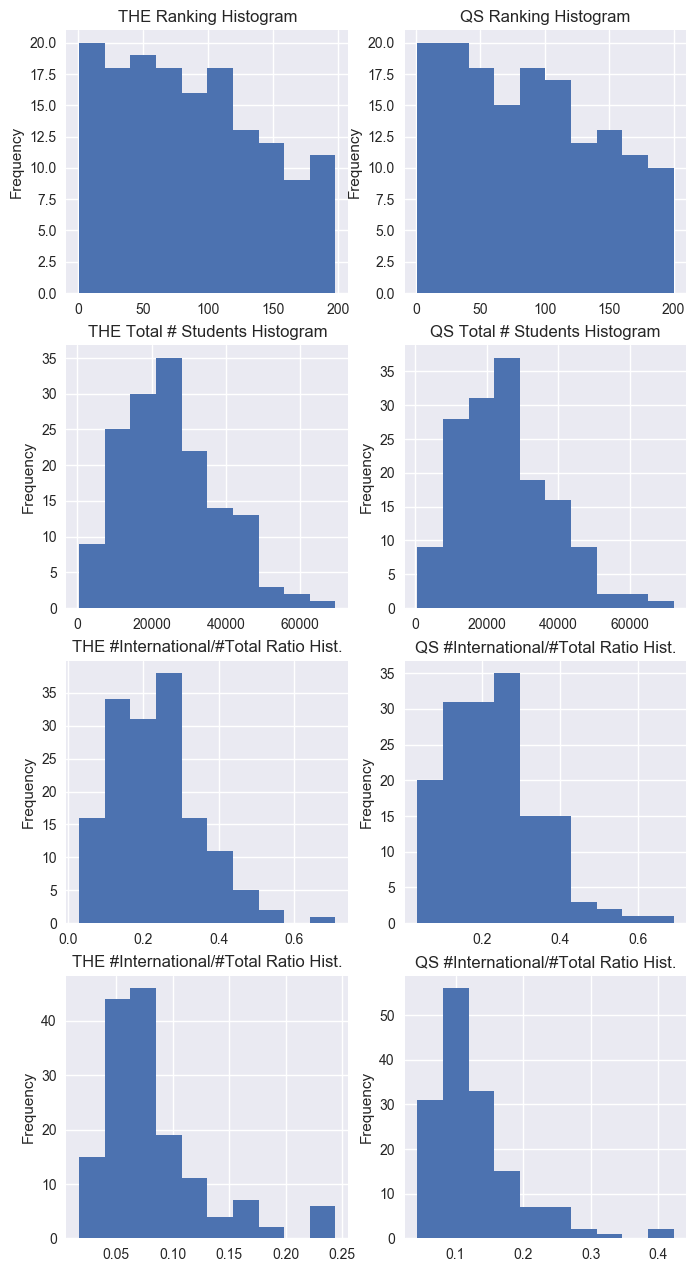

In [42]:
plt.figure(figsize=(8, 16), dpi= 100)
ax1= plt.subplot(4,2,1)
DF_merged_['rank_display_THE'].plot.hist(ax=ax1, title='THE Ranking Histogram')
ax2= plt.subplot(4,2,2)
DF_merged_['rank_display_QS'].plot.hist(ax=ax2, title='QS Ranking Histogram')
ax3= plt.subplot(4,2,3)
DF_merged_['total_std_THE'].plot.hist(ax=ax3, title='THE Total # Students Histogram')
ax4= plt.subplot(4,2,4)
DF_merged_['total_std_QS'].plot.hist(ax=ax4, title='QS Total # Students Histogram')
ax5= plt.subplot(4,2,5)
DF_merged_['interStd_totalStd_ratio_THE'].plot.hist(ax=ax5, title='THE #International/#Total Ratio Hist.')
ax6= plt.subplot(4,2,6)
DF_merged_['interStd_totalStd_ratio_QS'].plot.hist(ax=ax6, title='QS #International/#Total Ratio Hist.')
ax7= plt.subplot(4,2,7)
DF_merged_['Fac_Std_ratio_THE'].plot.hist(ax=ax7, title='THE #International/#Total Ratio Hist.')
ax8= plt.subplot(4,2,8)
DF_merged_['Fac_Std_ratio_QS'].plot.hist(ax=ax8, title='QS #International/#Total Ratio Hist.')

### Analysis

-

# Exercice 5

For the merging, we considered that both rankings had the same relevance, therefore we could simply take the mean (or the sum, since it won't change the order) of both rank values.

In [101]:
# take only universities that were on both rankings
merged_without_nan = DF_merged_.dropna()

# sum the rank
merged_without_nan['rank_sum'] = merged_without_nan[['rank_display_QS','rank_display_THE']].sum(axis=1)

# sort them
final_ranking = merged_without_nan.sort_values(['rank_sum'], ascending=True).reset_index(drop=True)

# compute final rank
final_ranking['rank'] = final_ranking[['rank_sum']].rank(method='min', numeric_only=True).astype(int)
print(final_ranking[['rank','title_THE']].to_string(index=False))


rank                                          title_THE
   1                                Stanford University
   2              Massachusetts Institute of Technology
   3                               University of Oxford
   3                            University of Cambridge
   3                 California Institute of Technology
   6                                 Harvard University
   7                            Imperial College London
   8                              University of Chicago
   9                               Princeton University
   9  ETH Zurich – Swiss Federal Institute of Techno...
  11                          University College London
  12                                    Yale University
  13                         University of Pennsylvania
  14                           Johns Hopkins University
  15                                Columbia University
  16                                 Cornell University
  17                   National University of Si